content
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


Attribute Information
#1.Age: age of the patient [years]
#2.Sex: sex of the patient [M: Male, F: Female]
#3.ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#4.RestingBP: resting blood pressure [mm Hg]
#5.Cholesterol: serum cholesterol [mm/dl]
#6.FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#7.RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
#8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#9.ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#10.Oldpeak: oldpeak = ST [Numeric value measured in depression]
#11.ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#12.HeartDisease: output class [1: heart disease, 0: Normal]                                               

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

DATA COLLECTION

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.head(914)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1


In [5]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#DATA ENCODING


In [6]:
object_col = dataset.select_dtypes(include="object").columns
dataset[object_col]=dataset[object_col].astype("object")
dataset.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
object_col=dataset.select_dtypes("object").columns.to_list()
dataset[object_col].head()
for col in object_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(dataset[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers

LE=LabelEncoder()

categories = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for label in categories:
    dataset[label]=LE.fit_transform(dataset[label])
dataset.head(914)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
909,63,0,0,124,197,0,1,136,1,0.0,1,1
910,41,1,1,120,157,0,1,182,0,0.0,2,0
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1


In [9]:
# sex= Male = 1, Female = 0
# Chest pain type =ASY=0, ATA=1,NAP=2 ,TA=3
# Restings ECG =LVH=0, Normal =1,ST-2
# Exercise Angina =n=0,y=1
# ST_slope = flat=1,up=2

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null int32
ChestPainType     918 non-null int32
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null int32
MaxHR             918 non-null int64
ExerciseAngina    918 non-null int32
Oldpeak           918 non-null float64
ST_Slope          918 non-null int32
HeartDisease      918 non-null int64
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


#DATA CLEANING

In [11]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

PROCESS OF NULL VALUES REMOVE

In [12]:
#1)Replacing the missing values with central tendancy-mean,median,mode
#2)entire row delete
#3)Respective to the problem,have to replace the missing values
#4)consider this as a semi supervised,create a model,so that  we can predict the missing values.

ANALYSIS THE DATA UNIVARIANT AND BIVARIANT

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [14]:
Quan=[]
Qual=[]

In [15]:
for columnName in dataset.columns:
    print(columnName)
    if(dataset[columnName].dtypes=="O"):
        Qual.append(columnName)
    else:
        Quan.append(columnName)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [16]:
def QuanQual():
    Quan=[]
    Qual=[]
    for columnName in dataset.columns:
        print(columnName)
        if(dataset[columnName].dtypes=="O"):
            #print("Qual")
            Qual.append(columnName)
        else:
            #print("Quan")
            Quan.append(columnName)
    return Quan,Qual

In [17]:
Quan,Qual=QuanQual()

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [18]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","25th","50th","75th","99th","100th",\
                             "IQR","1.5IQR","Lesser","Greater","Min","Max"],columns=Quan)
for columnName in Quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["25th"]=np.percentile(dataset[columnName],25)
    descriptive[columnName]["50th"]=np.percentile(dataset[columnName],50)
    descriptive[columnName]["75th"]=np.percentile(dataset[columnName],75)
    descriptive[columnName]["99th"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["100th"]=np.percentile(dataset[columnName],100)
    descriptive[columnName]["IQR"]=descriptive[columnName]["75th"]-descriptive[columnName]["25th"]
    descriptive[columnName]["1.5IQR"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["25th"]-descriptive[columnName]["1.5IQR"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["75th"]+descriptive[columnName]["1.5IQR"]
    descriptive[columnName]["Min"]=descriptive[columnName].min()
    descriptive[columnName]["Max"]=descriptive[columnName].max()

In [19]:
descriptive

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Mean,53.5109,0.78976,0.781046,132.397,198.8,0.233115,0.989107,136.809,0.404139,0.887364,1.36166,0.553377
Median,54,1,0,130,223,0,1,138,0,0.6,1,1
Mode,54,1,0,120,0,0,1,150,0,0,1,1
25th,47,1,0,120,173.25,0,1,120,0,0,1,0
50th,54,1,0,130,223,0,1,138,0,0.6,1,1
75th,60,1,2,140,267,0,1,156,1,1.5,2,1
99th,74,1,3,180,411.49,1,2,186,1,4,2,1
100th,77,1,3,200,603,1,2,202,1,6.2,2,1
IQR,13,0,2,20,93.75,0,0,36,1,1.5,1,1
1.5IQR,19.5,0,3,30,140.625,0,0,54,1.5,2.25,1.5,1.5


BIVARIANT

In [20]:
dataset.cov()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,88.974254,0.214397,-0.696086,44.427519,-98.309701,0.790260,-0.044592,-91.750920,0.999410,2.601774,-1.536114,1.323300
Sex,0.214397,0.166220,-0.049355,0.038743,-8.923320,0.020710,0.018427,-1.963786,0.038167,0.045977,-0.037296,0.061943
ChestPainType,-0.696086,-0.049355,0.914929,-0.365650,7.102195,-0.029601,-0.043827,7.041094,-0.166595,-0.180960,0.123983,-0.184047
RestingBP,44.427519,0.038743,-0.365650,342.773903,204.323837,0.549778,0.264957,-52.857808,1.409916,3.254307,-0.844758,0.990808
Cholesterol,-98.309701,-8.923320,7.102195,204.323837,11964.891079,-12.076452,-13.580157,656.671673,-1.834938,5.850572,7.401903,-12.663226
FastingBS,0.790260,0.020710,-0.029601,0.549778,-12.076452,0.178968,0.023262,-1.415709,0.012556,0.023778,-0.045141,0.056246
RestingECG,-0.044592,0.018427,-0.043827,0.264957,-13.580157,0.023262,0.399009,-2.883213,0.024036,-0.013769,-0.002599,0.018030
MaxHR,-91.750920,-1.963786,7.041094,-52.857808,656.671673,-1.415709,-2.883213,648.228614,-4.630617,-4.363589,5.307841,-5.071057
ExerciseAngina,0.999410,0.038167,-0.166595,1.409916,-1.834938,0.012556,0.024036,-4.630617,0.241073,0.214055,-0.127780,0.120717
Oldpeak,2.601774,0.045977,-0.180960,3.254307,5.850572,0.023778,-0.013769,-4.363589,0.214055,1.137572,-0.324978,0.214307


In [21]:
dataset.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


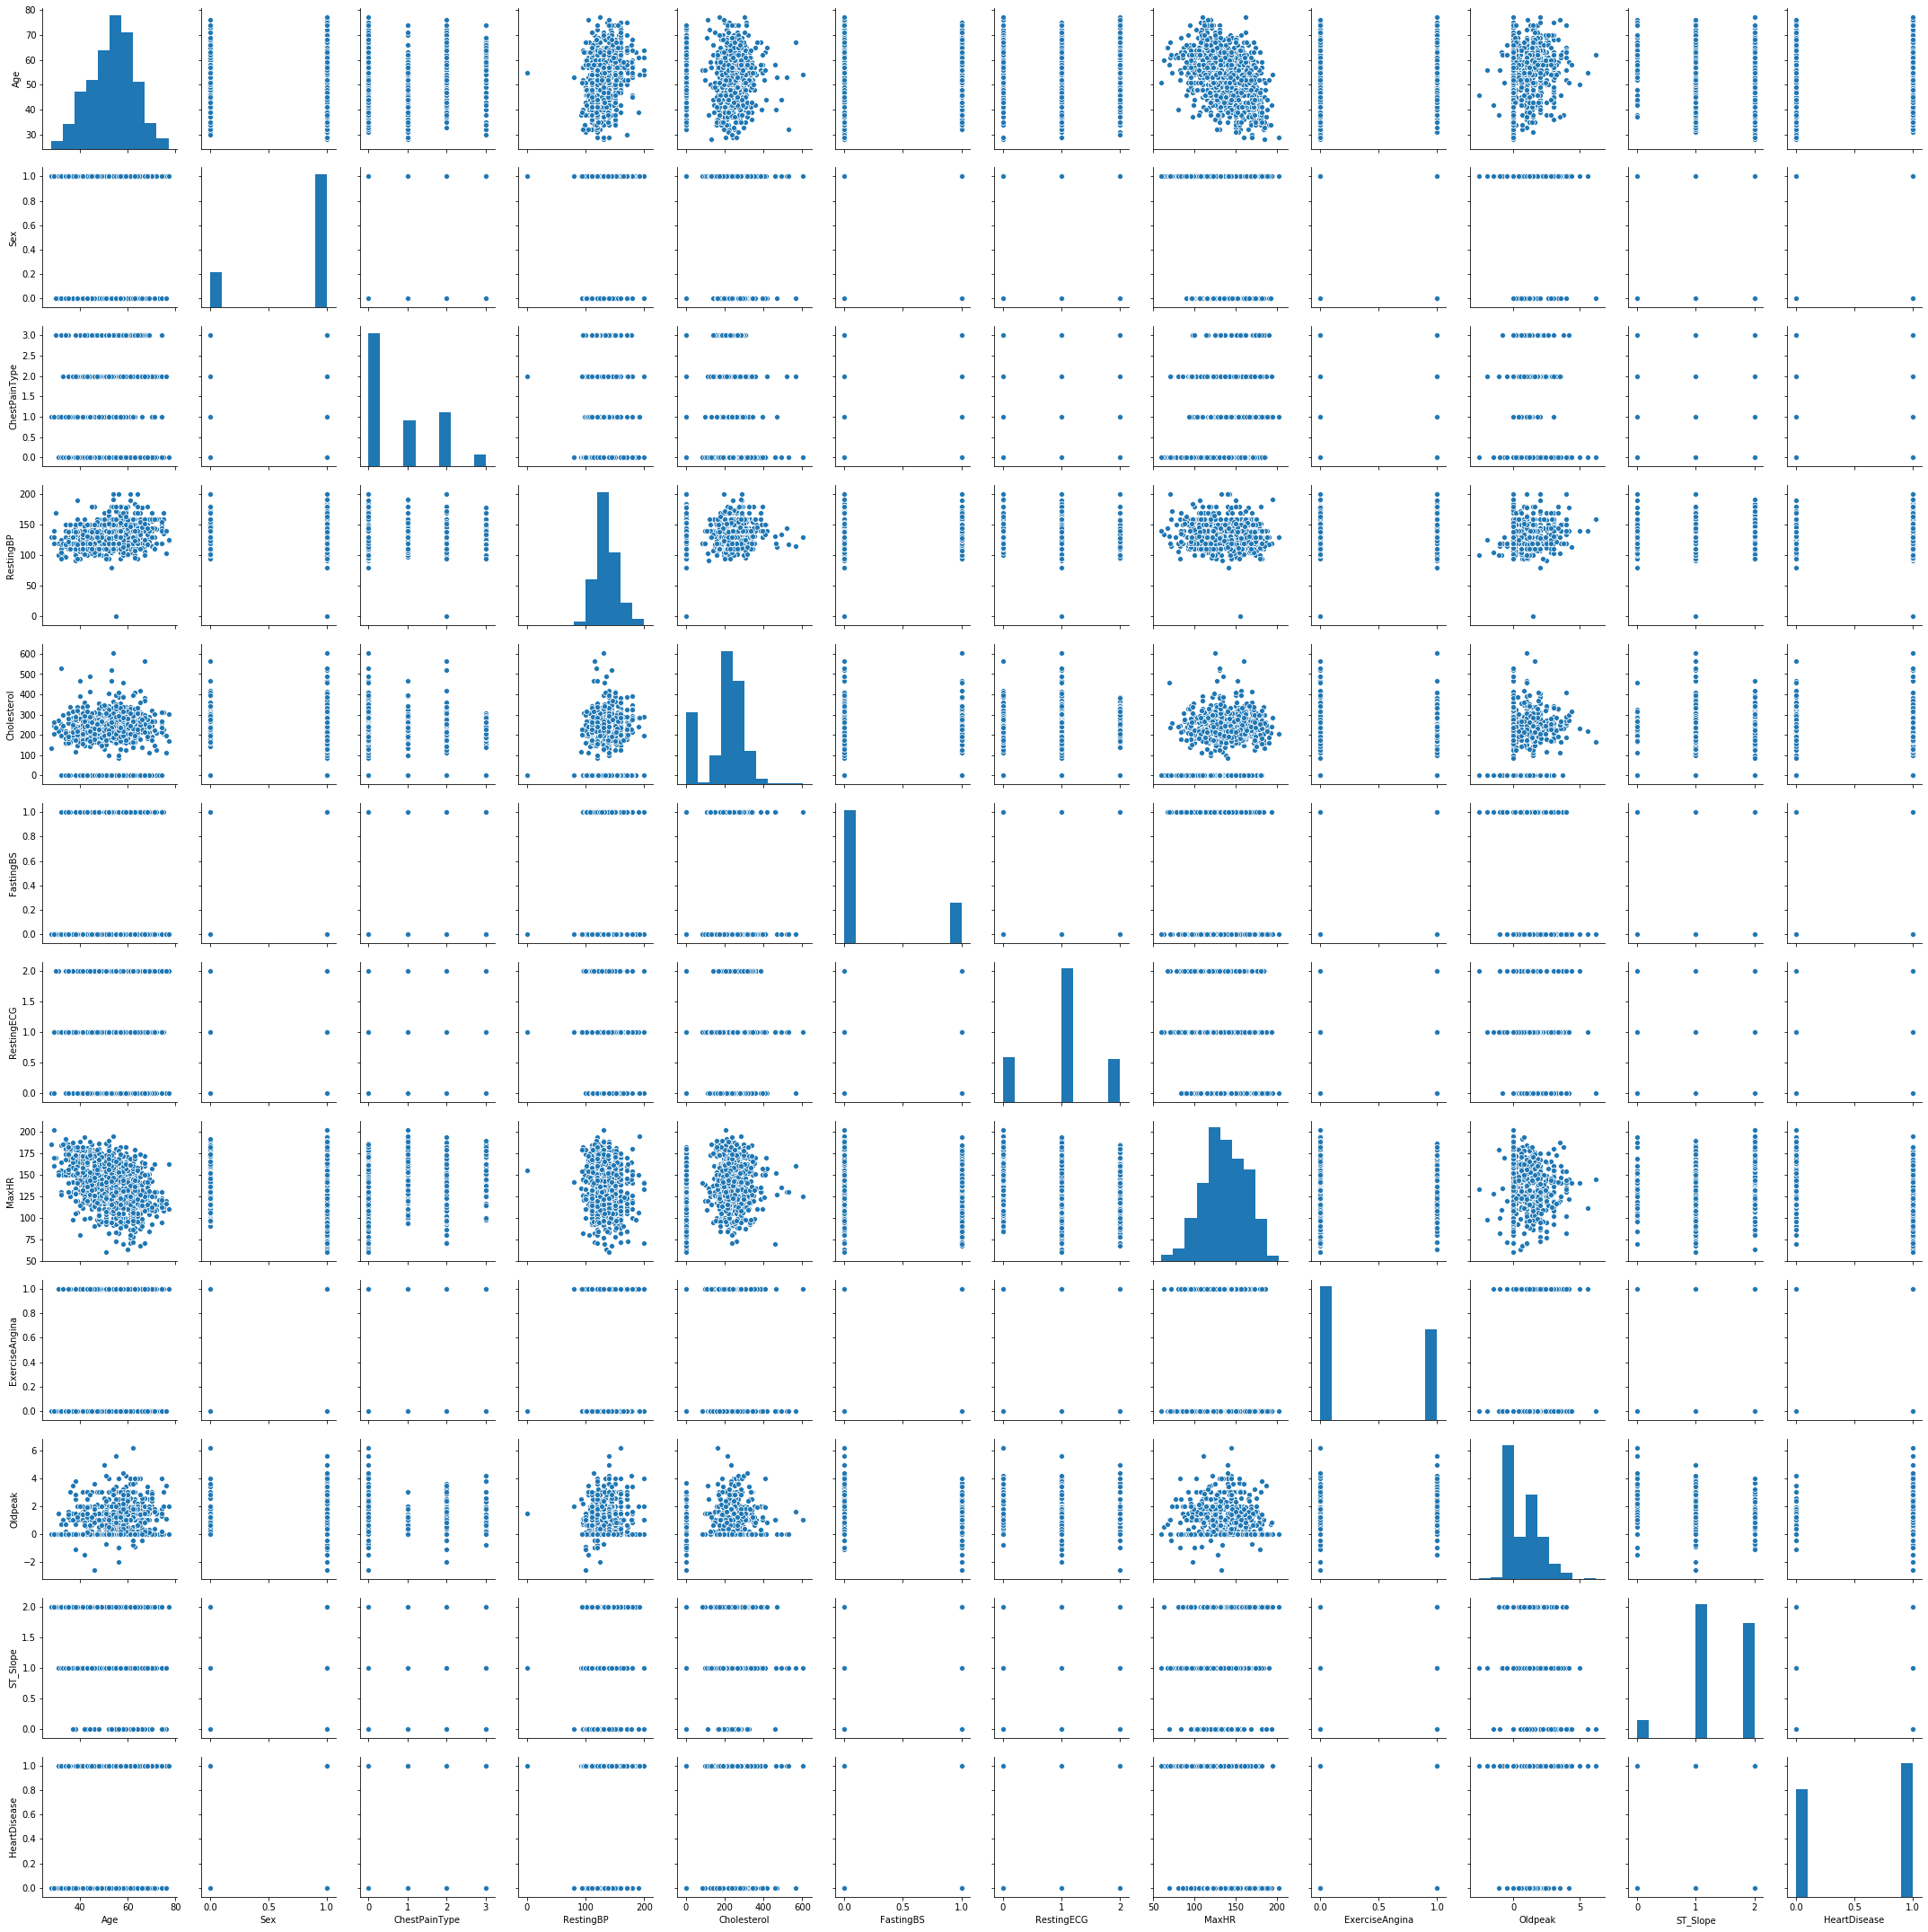

In [22]:
sns.pairplot(dataset)

In [23]:
print(sklearn.__version__)

1.0.2


Find the correlation between the variables and the target variable (HeartDisease)

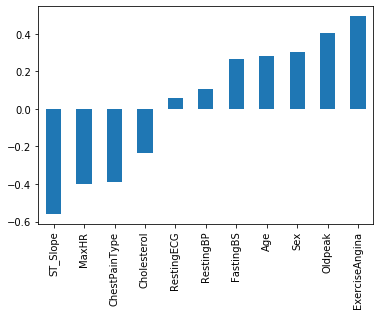

In [24]:
dataset.corr()['HeartDisease'][:-1].sort_values().plot(kind='bar')

HeartDisease Percentage

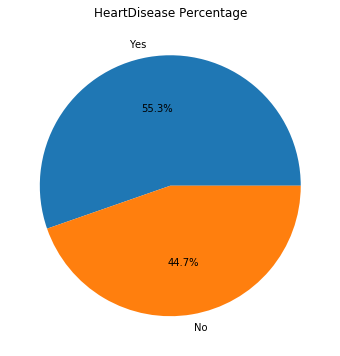

In [25]:
#plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6))
plt.pie(dataset['HeartDisease'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('HeartDisease Percentage')
plt.show()

Gender and Heart Disease

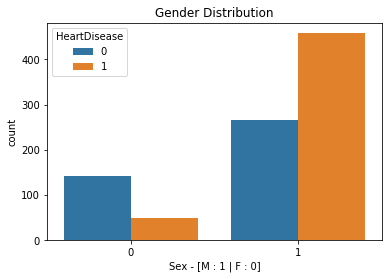

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='HeartDisease', data=dataset)
plt.title('Gender Distribution')
plt.xlabel('Sex - [M : 1 | F : 0]')
plt.ylabel('count')
plt.show()

Age Distribution

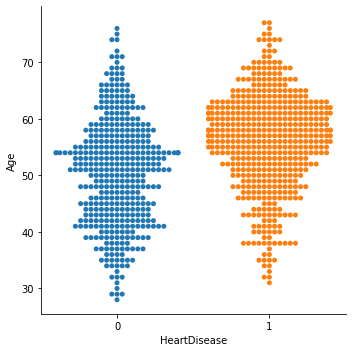

In [27]:
#catplot for age distribution
sns.catplot(x="HeartDisease", y="Age", kind="swarm",data=dataset)

ChestpainType and Heart Disease

<function matplotlib.pyplot.show(*args, **kw)>

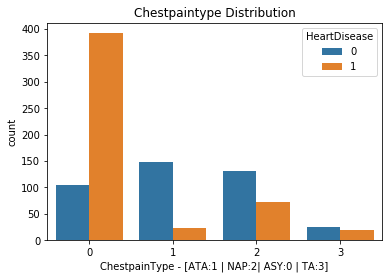

In [28]:
sns.countplot(x='ChestPainType', data=dataset, hue='HeartDisease')
plt.title('Chestpaintype Distribution')
plt.xlabel('ChestpainType - [ATA:1 | NAP:2| ASY:0 | TA:3]')
plt.ylabel('count')
plt.show

FastingBS and Heart Disease

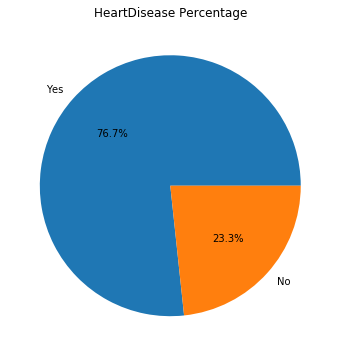

In [29]:
#plot pie chart to show FastingBS percentage
plt.figure(figsize=(10,6))
plt.pie(dataset['FastingBS'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('HeartDisease Percentage')
plt.show()

FastingsBS Distribution

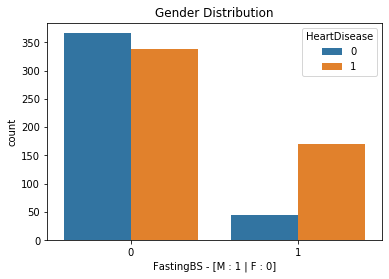

In [30]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=dataset)
plt.title('Gender Distribution')
plt.xlabel('FastingBS - [M : 1 | F : 0]')
plt.ylabel('count')
plt.show()

Max heart rate and Heart Disease

both boxplot and violinplot shows strange inversely relation between the MaxHR and HeartDisease.According to the graphs the decreasedvalue of Max HR highlights increased risk of Heart Disease.However in HeartDisease there is increased max heart rate at 100 and increased spread 120-130 as compared to non HeartDisease 



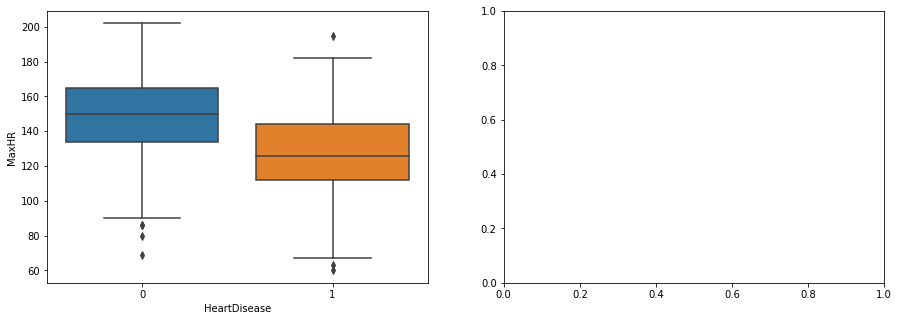

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=dataset, ax=ax[0])

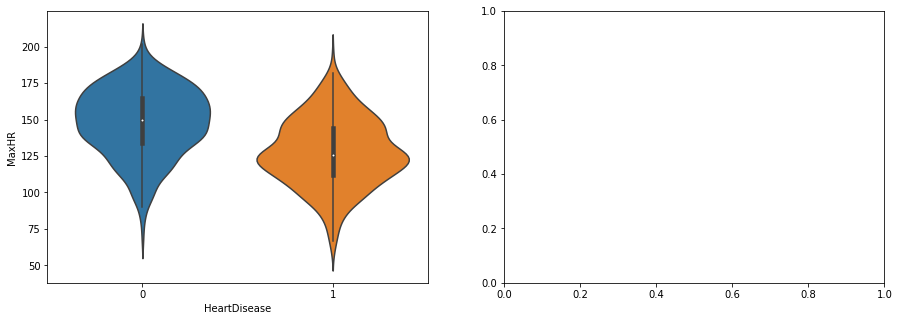

In [32]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x='HeartDisease', y='MaxHR', data=dataset, ax=ax[0])

oldpeak and Heart Disease

Both boxplot and violinplot shows stranger relation between the depression and HeartDisease.According to the graphs the increased depression highlights increased risk of HeartDisease

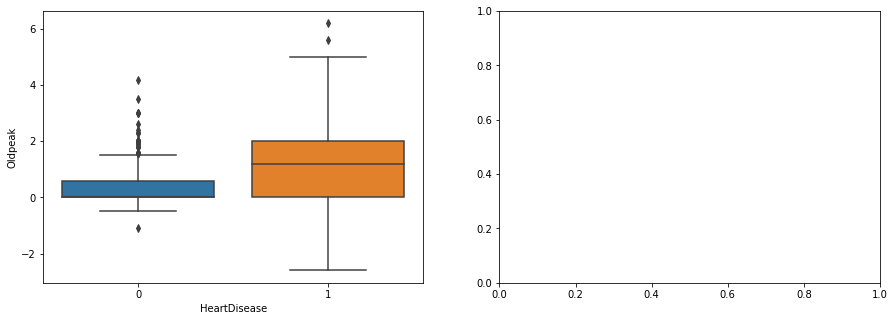

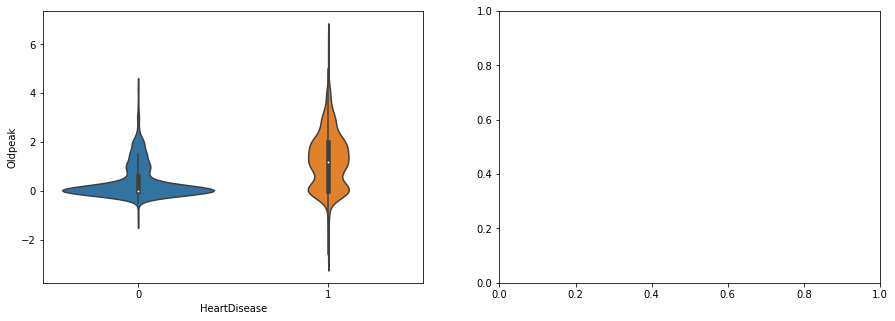

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='Oldpeak',data=dataset, ax=ax[0])
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x='HeartDisease', y='Oldpeak',data=dataset, ax=ax[0])

Exercise-induced angina and Heart Disease

plt.figure(figsize=(10,6))
plt.pie(dataset['ExerciseAngina'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%')
plt.title('ExeciseAngina Percentage')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

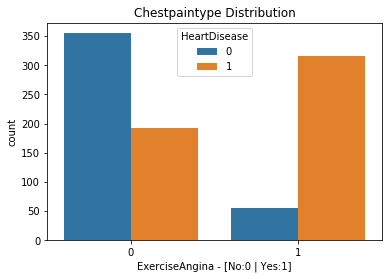

In [34]:
sns.countplot(x='ExerciseAngina', data=dataset, hue='HeartDisease')
plt.title('Chestpaintype Distribution')
plt.xlabel('ExerciseAngina - [No:0 | Yes:1]')
plt.ylabel('count')
plt.show

ST_Slope and Heart Disease

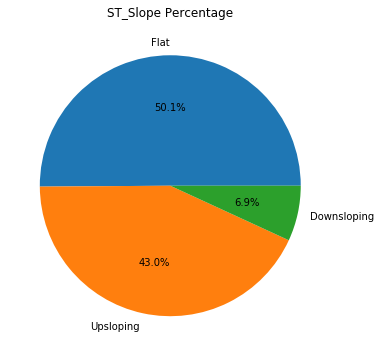

In [35]:
plt.figure(figsize=(10,6))
plt.pie(dataset['ST_Slope'].value_counts(), labels=['Flat', 'Upsloping', 'Downsloping'], autopct='%1.1f%%')
plt.title('ST_Slope Percentage')
plt.show()

ST_Slope Distribution

<function matplotlib.pyplot.show(*args, **kw)>

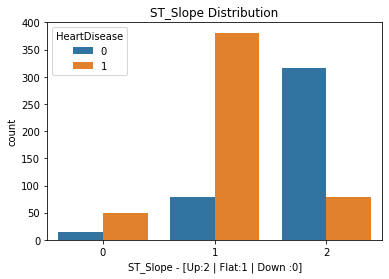

In [36]:
sns.countplot(x='ST_Slope', data=dataset, hue='HeartDisease')
plt.title('ST_Slope Distribution')
plt.xlabel('ST_Slope - [Up:2 | Flat:1 | Down :0]')
plt.ylabel('count')
plt.show

Countplot Shows Flat Slope has high risk of HeartDisease

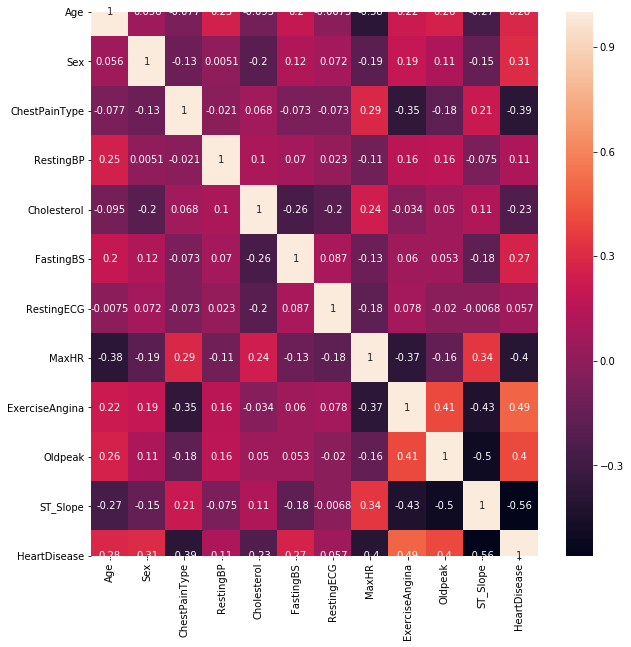

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

In [38]:
indep=dataset[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [39]:
dep=dataset[['HeartDisease']]

Train and Test Split

In [40]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)


#  Model Training

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'saga'],
             'penalty':['l2']} 



grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='f1_weighted', verbose=3)

In [43]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)


In [44]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'penalty': 'l2', 'solver': 'newton-cg'}: 0.8393832920630407


In [45]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[101  27]
 [ 22 156]]


In [46]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       128
           1       0.85      0.88      0.86       178

    accuracy                           0.84       306
   macro avg       0.84      0.83      0.83       306
weighted avg       0.84      0.84      0.84       306



Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':['auto','scale'],
             'C':[10,100,1000,2000,3000]} 



grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000, 3000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=3)

In [49]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)



In [50]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}: 0.8498312126497339


In [51]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[106  22]
 [ 24 154]]


In [52]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       128
           1       0.88      0.87      0.87       178

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



Decision Tress

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'splitter':['best','random']} 



grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [56]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)


In [57]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}: 0.7720784586910348


In [58]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[ 97  31]
 [ 39 139]]


In [59]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       128
           1       0.82      0.78      0.80       178

    accuracy                           0.77       306
   macro avg       0.77      0.77      0.77       306
weighted avg       0.77      0.77      0.77       306



Random Forest

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_= sc.fit_transform(X_train)
X_test_= sc.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]} 



grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1') 
   
# fitting the model for grid search 
grid.fit(X_train_, y_train) 
 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1', verbose=3)

In [63]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test_) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)


In [64]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}: 0.8790172278061552


In [65]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[109  19]
 [ 18 160]]


In [66]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       128
           1       0.89      0.90      0.90       178

    accuracy                           0.88       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.88      0.88      0.88       306



Support Vector Machine

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
from sklearn.svm import SVC

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':['auto','scale'],
             'C':[10,100,1000,2000,3000]} 



grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3,cv=5,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000, 3000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=3)

In [70]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)



In [71]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}: 0.8498312126497339


In [72]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[106  22]
 [ 24 154]]


In [73]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       128
           1       0.88      0.87      0.87       178

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



KNN

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

param_grid = {
    'base_estimator__n_neighbors': [3, 5, 7],
    'base_estimator__weights': ['uniform', 'distance'],
    'base_estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'base_estimator__p': [1, 2],
    'base_estimator__metric': ['euclidean', 'manhattan'],
}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Wrap the classifier in a CalibratedClassifierCV
calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')  # You can use 'isotonic' as well

# Create the GridSearchCV
grid = GridSearchCV(calibrated_knn, param_grid, refit=True, verbose=3, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model for grid search
grid.fit(X_train, y_train)

# Access the best parameters
best_params = grid.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DEll\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [77]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)


In [78]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'base_estimator__algorithm': 'auto', 'base_estimator__metric': 'manhattan', 'base_estimator__n_neighbors': 7, 'base_estimator__p': 1, 'base_estimator__weights': 'uniform'}: 0.8620396049238553


In [79]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[103  25]
 [ 17 161]]


In [80]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       128
           1       0.87      0.90      0.88       178

    accuracy                           0.86       306
   macro avg       0.86      0.85      0.86       306
weighted avg       0.86      0.86      0.86       306



comparing the model